In [1]:
from  fiona import listlayers
import os
os.environ['USE_PYGEOS'] = '0'

romaniaMaps=os.path.join('maps','romaniaMaps_3844_all.gpkg')

#layers in maps
listlayers(romaniaMaps)

['country',
 'cities',
 'rivers',
 'airports',
 'border',
 'states',
 'municipalities']

In [2]:
import os
import geopandas as gpd

states=gpd.read_file(romaniaMaps,layer='states')
municipalities=gpd.read_file(romaniaMaps,layer='municipalities')
airports=gpd.read_file(romaniaMaps,layer='airports')
rivers=gpd.read_file(romaniaMaps,layer='rivers')
border=gpd.read_file(romaniaMaps,layer='border')

In [3]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)
#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
infoseaports.rename(columns={'Main Port Name':'name'},inplace=True)

In [5]:

seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# no esta proyectado

# subset:
seaports_ro=seaports[seaports['Country Code']=='Romania'].copy()

# reset indexes
seaports_ro.reset_index(drop=True, inplace=True)

# reprojecting
seaports_ro_3844=seaports_ro.to_crs(3844) # proyectado

In [6]:
print(airports.columns)

Index(['name', 'kind', 'latitude_deg', 'longitude_deg', 'elevation_ft',
       'region_name', 'municipality', 'geometry'],
      dtype='object')


In [7]:
#PRIMERO SE MOSTRARA: MEDIUM AIRPORTS


<Axes: >

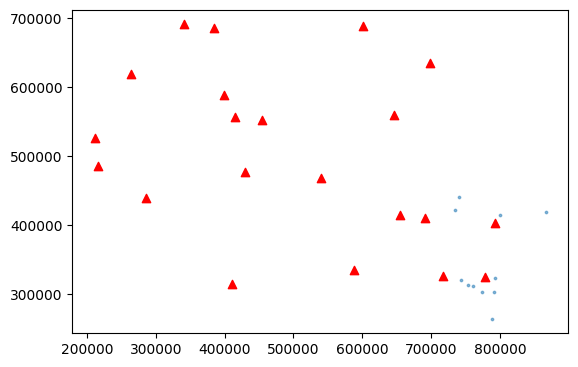

In [8]:
# subsetting
mediumAirports=airports[airports['kind']=='medium_airport'] 
mediumAirports.reset_index(drop=True, inplace=True)

#plotting
base=mediumAirports.plot(color='red',marker="^")
seaports_ro_3844.plot(ax=base,alpha=0.5,markersize=3)

In [9]:
seaports_ro_3844.set_index('name').geometry.apply\
(lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Arad International Airport,Bacău Airport,Boboc Air Base,Brașov-Ghimbav International Airport (U.C.),Băneasa International Airport,Caransebeş Airport,Cluj-Napoca International Airport,Craiova Airport,Câmpia Turzii Air Base,Feteşti Air Base,...,Iaşi Airport,Maramureș International Airport,Mihail Kogălniceanu International Airport,Oradea International Airport,Satu Mare Airport,Sibiu International Airport,Suceava Stefan cel Mare Airport,Timişoara Traian Vuia Airport,Transilvania Târgu Mureş International Airport,Tulcea Danube Delta Airport
name,,,,,,,,,,,,,,,,,,,,,
Basarabi,606.096978,287.700776,164.050782,286.377910,189.673320,508.317041,471.491654,363.407100,440.809270,61.750902,...,340.926698,546.795539,22.175808,600.167433,582.471244,386.787050,423.252058,588.366122,405.839423,102.055089
Braila,533.151323,164.076418,78.987986,198.904146,170.241779,449.404357,373.835817,340.148931,347.118075,97.468072,...,216.390227,438.207195,106.467385,509.388895,476.886921,309.791295,298.432200,522.631152,308.491874,61.151743
Cernavoda,570.597640,259.076912,129.712414,250.836100,156.290148,473.541382,436.118465,331.924059,405.253801,26.599192,...,318.216831,512.422964,35.108028,564.422579,547.663711,351.017268,395.258681,553.235643,370.544235,96.662999
Constanta,621.948260,295.154658,176.552979,300.271950,206.647678,524.819077,484.929819,380.697336,454.643408,77.881181,...,344.468172,558.751500,25.285878,614.562761,594.970936,401.993423,429.937795,604.619773,419.167050,99.720637
Danube-Black Sea Canal,583.318184,269.746416,142.293072,263.781964,167.932510,485.893950,449.031878,342.799627,418.203950,39.016683,...,326.821010,525.068246,26.556022,577.391045,560.434367,363.917173,405.773537,565.762859,383.438393,97.982834
Galati,536.792425,152.826360,89.439162,202.438434,186.385498,456.168010,372.348735,353.195143,346.931749,117.289480,...,199.264232,432.961679,121.501629,509.066181,472.499631,314.058896,285.125297,527.754294,307.608187,63.288734
Mangalia,633.765157,328.183075,201.213469,320.567824,212.669615,532.903782,506.141529,380.230425,474.712797,93.819491,...,381.400191,583.740579,61.123321,632.548948,618.608568,417.267366,463.870223,614.186799,440.805412,138.892321
Medgidia,590.157700,273.939281,148.150064,270.169026,174.809075,492.800657,455.323528,349.535096,424.599644,45.898874,...,329.587715,530.938278,21.646400,583.938599,566.471110,370.638674,409.809275,572.651757,389.690297,97.052782
Midia,615.289429,277.777522,164.701265,289.940120,204.949906,520.285054,473.545549,381.070969,443.926344,75.092138,...,324.974697,545.268402,14.291052,604.683036,582.155532,393.976498,411.912517,599.164195,407.692013,79.298437


In [10]:
#SE GUARDAN LOS VALORES
distanceMatrixKM_sea_air= seaports_ro_3844.set_index('name').geometry.apply\
                          (lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [11]:
#SE VE EL MINIMO, MEDIA Y MAXIMO
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)

# see some
SomeStats.head(10)

,mean,min,max
name,,,
Basarabi,357.831225,22.175808,606.096978
Braila,287.892936,44.575856,533.151323
Cernavoda,328.024806,26.599192,570.597640
Constanta,369.699417,25.285878,621.948260
Danube-Black Sea Canal,338.612406,26.556022,583.318184
Galati,290.743546,58.670709,536.792425
Mangalia,391.035597,61.123321,633.765157
Medgidia,343.742572,21.646400,590.157700
Midia,359.184757,14.291052,615.289429


In [12]:
#los aeropuertos más cercanos a cada seaport
distanceMatrixKM_sea_air.idxmin(axis=1)

name
Basarabi                  Mihail Kogălniceanu International Airport
Braila                                               Ianca Air Base
Cernavoda                                          Feteşti Air Base
Constanta                 Mihail Kogălniceanu International Airport
Danube-Black Sea Canal    Mihail Kogălniceanu International Airport
Galati                                               Ianca Air Base
Mangalia                  Mihail Kogălniceanu International Airport
Medgidia                  Mihail Kogălniceanu International Airport
Midia                     Mihail Kogălniceanu International Airport
Sulina                                  Tulcea Danube Delta Airport
Tulcea                                  Tulcea Danube Delta Airport
dtype: object

In [13]:
#el seaport más cercano a cada aeropuerto
distanceMatrixKM_sea_air.idxmin(axis=0)

name
Arad International Airport                           Braila
Bacău Airport                                        Galati
Boboc Air Base                                       Braila
Brașov-Ghimbav International Airport (U.C.)          Braila
Băneasa International Airport                     Cernavoda
Caransebeş Airport                                   Braila
Cluj-Napoca International Airport                    Galati
Craiova Airport                                   Cernavoda
Câmpia Turzii Air Base                               Galati
Feteşti Air Base                                  Cernavoda
Ianca Air Base                                       Braila
Iaşi Airport                                         Galati
Maramureș International Airport                      Galati
Mihail Kogălniceanu International Airport             Midia
Oradea International Airport                         Galati
Satu Mare Airport                                    Galati
Sibiu International Airport        

In [14]:
mins=distanceMatrixKM_sea_air.idxmin(axis=1)
mins

name
Basarabi                  Mihail Kogălniceanu International Airport
Braila                                               Ianca Air Base
Cernavoda                                          Feteşti Air Base
Constanta                 Mihail Kogălniceanu International Airport
Danube-Black Sea Canal    Mihail Kogălniceanu International Airport
Galati                                               Ianca Air Base
Mangalia                  Mihail Kogălniceanu International Airport
Medgidia                  Mihail Kogălniceanu International Airport
Midia                     Mihail Kogălniceanu International Airport
Sulina                                  Tulcea Danube Delta Airport
Tulcea                                  Tulcea Danube Delta Airport
dtype: object

In [15]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)#le ponemos alguna proyección

seaports_ro=seaports[seaports['Country Code']=='Romania'].copy()

seaports_ro.reset_index(drop=True, inplace=True)

seaports_ro_3844=seaports_ro.to_crs(3844) # proyectamos correctamente

In [16]:
seaports_ro_3844.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Columns: 109 entries, World Port Index Number to geometry
dtypes: float64(15), geometry(1), int64(1), object(92)
memory usage: 9.5+ KB


In [17]:
#airports_ro_3844=airports_ro.to_crs(3844) 
#airports_ro_3844

In [18]:
airports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)

airports_ro=airports[airports['Country Code']=='Romania'].copy()

airports_ro.reset_index(drop=True, inplace=True)
#Lo proyectamos correctamente
airports_ro_3844=airports_ro.to_crs(3844) 
airports_ro_3844

,World Port Index Number,Region Name,name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Sailing Direction or Publication,Publication Link,...,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude,geometry
0,43550.0,Romania -- 43540,Mangalia,,RO MAG,Romania,Black Sea; North Atlantic Ocean,,Admiralty Sailing Directions - NP24 - Black Se...,https://msi.geo.nga.mil/Publications/SDEnroute,...,Yes,Unknown,Yes,Yes,Major,Medium,Medium,43.816667,28.583333,POINT (788394.879 263795.915)
1,43560.0,Romania -- 43540,Constanta,Constantsa,RO CND,Romania,Black Sea; North Atlantic Ocean,,Admiralty Sailing Directions - NP24 - Black Se...,https://msi.geo.nga.mil/Publications/SDEnroute,...,Yes,Unknown,Yes,Yes,Moderate,Medium,Large,44.166667,28.650000,POINT (792003.768 302906.808)
2,43600.0,Romania -- 43540,Galati,,RO GAL,Romania,Black Sea; North Atlantic Ocean,,Sailing Directions Pub. 183 (Enroute) - North ...,https://msi.geo.nga.mil/api/publications/downl...,...,Yes,Unknown,Yes,Yes,Moderate,Small,Unknown,45.416667,28.083333,POINT (741377.563 439859.568)
3,43570.0,Romania -- 43540,Sulina,Suluna,RO SUL,Romania,Black Sea; North Atlantic Ocean,,Admiralty Sailing Directions - NP24 - Black Se...,https://msi.geo.nga.mil/Publications/SDEnroute,...,Yes,Unknown,Unknown,Yes,Moderate,Unknown,Unknown,45.166667,29.666667,POINT (866824.059 418106.080)
4,43566.0,Romania -- 43540,Cernavoda,,RO CEV,Romania,Black Sea; North Atlantic Ocean,,Sailing Directions Pub. 183 (Enroute) - North ...,https://msi.geo.nga.mil/api/publications/downl...,...,Yes,Unknown,Unknown,Unknown,Limited,Unknown,Unknown,44.333333,28.050000,POINT (743336.621 319431.591)
5,43562.0,Romania -- 43540,Medgidia,,RO MED,Romania,Black Sea; North Atlantic Ocean,,Sailing Directions Pub. 183 (Enroute) - North ...,https://msi.geo.nga.mil/api/publications/downl...,...,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,Small,44.250000,28.266667,POINT (760984.099 310851.594)
6,43558.0,Romania -- 43540,Basarabi,,RO BAB,Romania,Black Sea; North Atlantic Ocean,,Admiralty Sailing Directions - NP24 - Black Se...,https://msi.geo.nga.mil/Publications/SDEnroute,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Small,44.166667,28.433333,POINT (774682.711 302147.934)
7,43565.0,Romania -- 43540,Danube-Black Sea Canal,,,Romania,Black Sea; North Atlantic Ocean,,Sailing Directions Pub. 183 (Enroute) - North ...,https://msi.geo.nga.mil/api/publications/downl...,...,No,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,44.266667,28.183333,POINT (754258.164 312437.253)
8,43568.0,Romania -- 43540,Midia,,RO MID,Romania,Black Sea; North Atlantic Ocean,,Admiralty Sailing Directions - NP24 - Black Se...,https://msi.geo.nga.mil/Publications/SDEnroute,...,Yes,Unknown,Unknown,Unknown,Moderate,Medium,Small,44.350000,28.666667,POINT (792411.837 323327.614)
9,43590.0,Romania -- 43540,Braila,,RO BRA,Romania,Black Sea; North Atlantic Ocean,,Sailing Directions Pub. 183 (Enroute) - North ...,https://msi.geo.nga.mil/api/publications/downl...,...,Yes,Unknown,Yes,Yes,Limited,Small,Unknown,45.250000,27.983333,POINT (734244.796 421050.576)


In [19]:
#seaports_ro_3844
airports_ro_3844.columns.to_list()

['World Port Index Number',
 'Region Name',
 'name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Management Syste

In [21]:
base=seaports_ro_3844[seaports_ro_3844.name.str.contains('Basarabi')].explore(color='red', marker_kwds=dict(radius=10))
# Los más cercanos los graficamos de rojo
airports_ro_3844[airports_ro_3844.name.str.contains(' Mihail Kogălniceanu International Airport')].explore(m=base,color='orange',marker_kwds=dict(radius=10))

IndexError: list index out of range

In [23]:
from folium import LayerControl

base=seaports_ro_3844.explore(color='black')
# Los más cercanos los graficamos de rojo
airports_ro_3844[airports_ro_3844.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=5))

#aqui deberia cargar el mapa pero me sale error: "<folium.folium.Map at 0x1d0d0e0dbd0>"

IndexError: list index out of range